In [10]:
import csv
import numpy as np
import scipy
import pandas as pd
import scipy.stats
import sklearn
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

features = pd.read_csv("/home/eynaud/Documents/5A/supervised/TP1/Resource/alt_acsincome_ca_features_85.csv")
labels =  pd.read_csv("/home/eynaud/Documents/5A/supervised/TP1/Resource/alt_acsincome_ca_labels_85.csv")

features.info

<bound method DataFrame.info of         AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P
0       41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0  2.0    1.0
1       77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0  1.0    1.0
2       38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0  1.0    1.0
3       30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0  1.0    6.0
4       36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0  2.0    1.0
...      ...  ...   ...  ...     ...    ...   ...   ...  ...    ...
166310  25.0  1.0  20.0  1.0  4720.0    6.0   7.0   8.0  2.0    1.0
166311  34.0  1.0  22.0  1.0   110.0  210.0   0.0  40.0  1.0    6.0
166312  54.0  3.0  18.0  1.0  7700.0    6.0   1.0  50.0  1.0    1.0
166313  39.0  1.0  16.0  5.0  9130.0    6.0   0.0  50.0  1.0    1.0
166314  32.0  1.0   9.0  5.0  4020.0  303.0   0.0  40.0  2.0    8.0

[166315 rows x 10 columns]>

array([[<Axes: title={'center': 'AGEP'}>,
        <Axes: title={'center': 'COW'}>,
        <Axes: title={'center': 'SCHL'}>],
       [<Axes: title={'center': 'MAR'}>,
        <Axes: title={'center': 'OCCP'}>,
        <Axes: title={'center': 'POBP'}>],
       [<Axes: title={'center': 'RELP'}>,
        <Axes: title={'center': 'WKHP'}>,
        <Axes: title={'center': 'SEX'}>],
       [<Axes: title={'center': 'RAC1P'}>, <Axes: >, <Axes: >]],
      dtype=object)

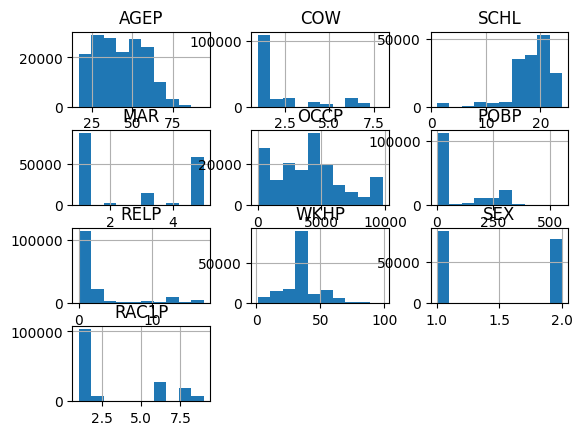

In [11]:
### Histogramme des donn&es
features.hist()

In [12]:
#Normalisation (on normalise uniquement les données numériques)
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.25, random_state=42)

my_scaler = StandardScaler()
standars_feature = ['AGEP', 'WKHP']
X_train[standars_feature] = my_scaler.fit_transform(X_train[standars_feature])
X_val[standars_feature] = my_scaler.transform(X_val[standars_feature])

joblib.dump(my_scaler, 'scaler.joblib')
              
my_scaler.feature_names_in_

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_val.shape)
print('Testing Labels Shape:', y_val.shape)

Training Features Shape: (124736, 10)
Training Labels Shape: (124736, 1)
Testing Features Shape: (41579, 10)
Testing Labels Shape: (41579, 1)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

rf = RandomForestClassifier()
cross_val_score(rf, features, labels, cv=5, scoring='accuracy')

/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-pa

array([0.81547064, 0.81285512, 0.8158314 , 0.81147221, 0.81751496])

In [14]:
ab = AdaBoostClassifier()
cross_val_score(ab, features, labels, cv=5, scoring='accuracy')

/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/ensemble/_

array([0.80963834, 0.80681237, 0.80945796, 0.80696269, 0.81261462])

In [15]:
gb = GradientBoostingClassifier()
cross_val_score(gb, features, labels, cv=5, scoring='accuracy')

/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site

array([0.81456874, 0.8124643 , 0.81640261, 0.81261462, 0.81685356])

In [16]:
base_learners = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('ab', AdaBoostClassifier())
]

meta_learner = LogisticRegression()

st = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

cross_val_score(st, features, labels, cv=5, scoring='accuracy')

/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/

array([0.82046117, 0.81754502, 0.82037098, 0.81730451, 0.82328714])

In [18]:
grid_param_RandomForest = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

grid_param_AdaBoost = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 2.0],
}

grid_param_GradientBoosting = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 2.0],
    'max_depth': [None, 3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [ ]:
grid_search_RandomForest = GridSearchCV(estimator=rf, param_grid=grid_param_RandomForest, cv=5, verbose=2, n_jobs=-1)
grid_search_RandomForest.fit(X_train, y_train)

print("best params : ", grid_search_RandomForest.best_params_)
print("best precision : ", grid_search_RandomForest.best_score_)

test_score = grid_search_RandomForest.score(X_val, y_val)

print("Précision sur l'ensemble de test : ", test_score)

/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/eynaud/Documents/5A/supervised/TP1/tp-supervise/lib/python3.12/site-pa

In [ ]:
joblib.dump(grid_search_RandomForest.best_estimator_, 'RandomForest_BestModel______joblib')

In [ ]:
grid_search_AdaBoost = GridSearchCV(estimator=ab, param_grid=grid_param_AdaBoost, cv=5, verbose=2, n_jobs=-1)
grid_search_AdaBoost.fit(X_train, y_train)

print("best params : ", grid_search_AdaBoost.best_params_)
print("best precision : ", grid_search_AdaBoost.best_score_)

test_score = grid_search_AdaBoost.score(X_val, y_val)

print("Précision sur l'ensemble de test : ", test_score)

In [ ]:
joblib.dump(grid_search_AdaBoost.best_estimator_, 'AdaBoost_BestModel______joblib')

In [ ]:
grid_search_GradientBoosting = GridSearchCV(estimator=gb, param_grid=grid_param_GradientBoosting, cv=5, verbose=2, n_jobs=-1)
grid_search_GradientBoosting.fit(X_train, y_train)

print("best params : ", grid_search_GradientBoosting.best_params_)
print("best precision : ", grid_search_GradientBoosting.best_score_)

test_score = grid_search_GradientBoosting.score(X_val, y_val)

print("Précision sur l'ensemble de test : ", test_score)

In [ ]:
joblib.dump(grid_search_GradientBoosting.best_estimator_, 'GradientBoosting_BestModel______joblib')